In [22]:
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import skeletonize, thin
from skimage.util import invert
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


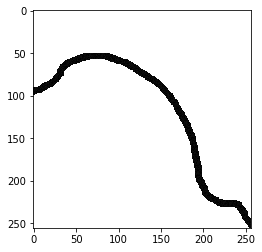

In [34]:
size = 256
img = cv2.imread("river.png")
row,col, _= img.shape
mean = 0
var = 0.1
sigma = var**0.5
gaussian = np.random.random((row, col, 1)).astype(np.float32)
gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
gaussian_img = cv2.addWeighted(img, 0.75, 0.25 * gaussian, 0.25, 0, dtype = cv2.CV_32F)
plt.imshow(gaussian_img)

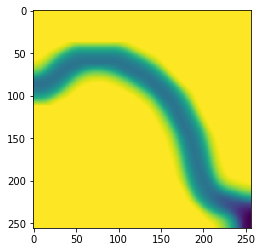

In [56]:
im = cv2.imread("river.png", 0)

for i in range(100000):
    im = cv2.GaussianBlur(im, (5, 5), 0)
plt.imshow(im)

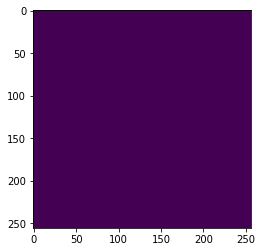

In [48]:
im_ga = cv2.GaussianBlur(im, (21,21), 0)
plt.imshow(im_ga)

In [46]:
ske = (skeletonize(im//255) * 255).astype(np.uint8)
plt.imshow(gray)

NameError: name 'gray' is not defined

(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]


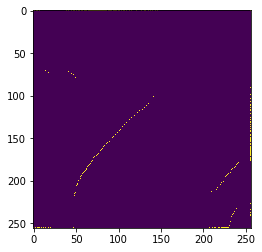

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('river.png', 0)
print(img.shape)
# plt.imshow(img)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
print(element)
while( not done):
    eroded = cv2.erode(img, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(img, temp)
    skel = cv2.bitwise_or(skel, temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
 
plt.imshow(skel)


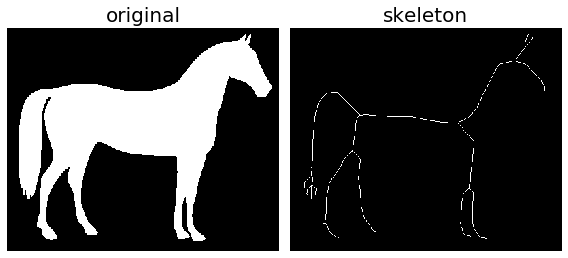

In [5]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
print(data.horse())
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()